# Wireframe Shader

based on: http://cgg-journal.com/2008-2/06/index.html

https://learnopengl.com/Advanced-OpenGL/Geometry-Shader

## Observations
- The fragment shader receives interpolated values from the output of the geometry shader. Each point on the screen thus receives a interpolated distance vector with the distances to the three vertices of the triangle it inhabits. 

# Orbital Shader

From http://www.pouet.net/prod.php?which=57245

Credits to 'Danilo Guanabara'

A very nice shader 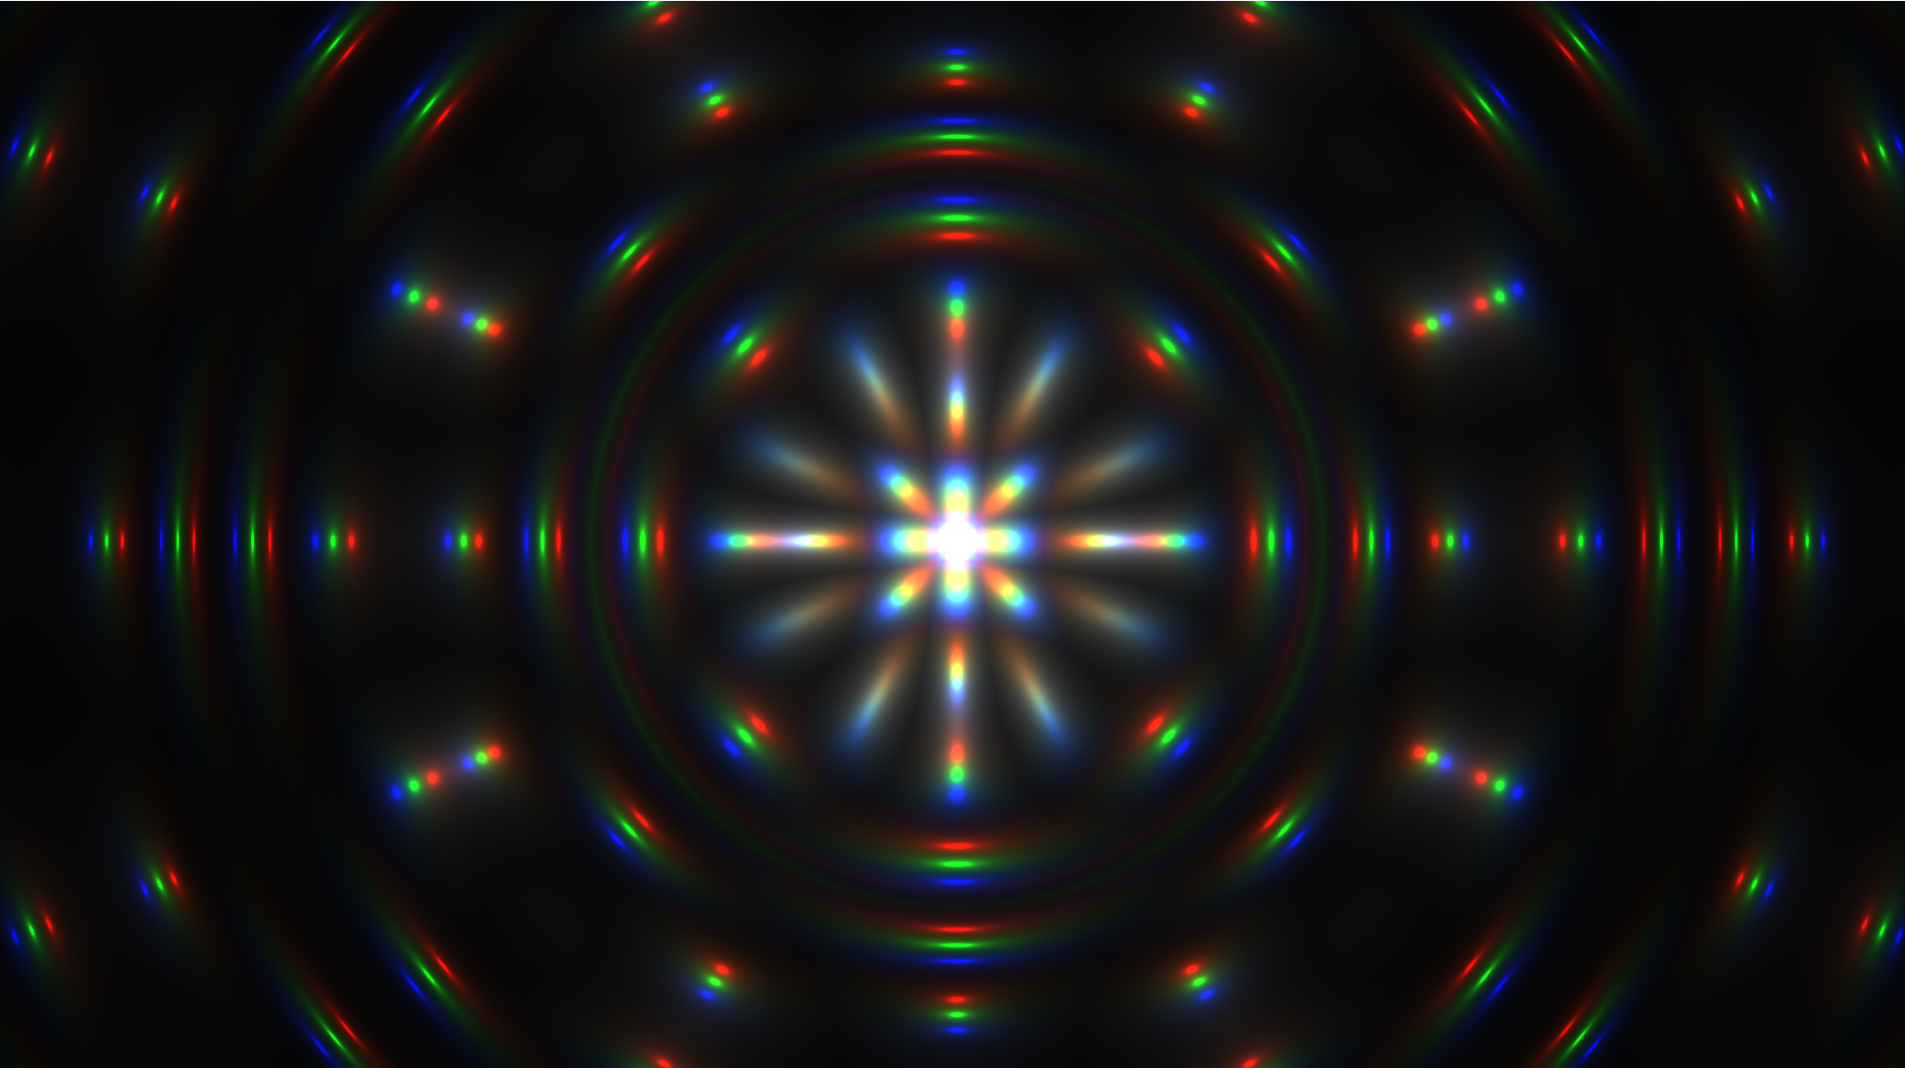

a problem with using this shader on a plane object: the shader uses global frag-coordinates instead of local coordinates in relation to the plane. This results in the pattern not displaying properly when used as a shader for non-screenfilling meshes. 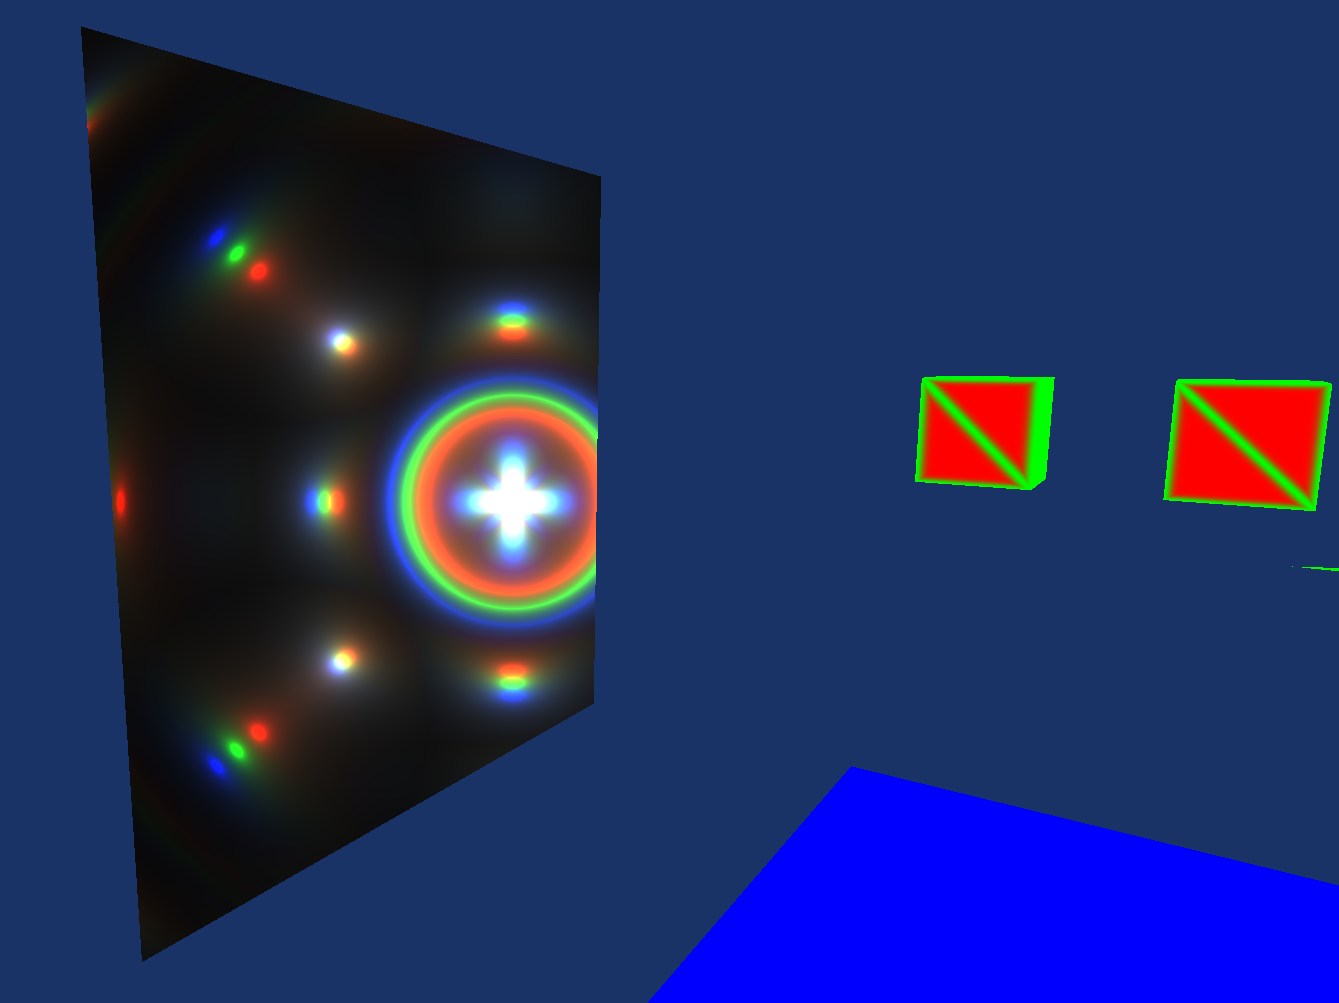

Lets look at the code and see how we can fix this

```
#version 330 core

in vec3 fragmentColor;

out vec4 screenColor;

uniform float u_time;
uniform vec2 u_resolution;
uniform vec2 u_center; 


void main() {

    	vec3 c;
	float l,z=u_time;
	for(int i=0;i<3;i++) {
		vec2 uv = gl_FragCoord.xy / u_resolution;
        	vec2 p = gl_FragCoord.xy / u_resolution;
		uv=p;
		p-=.5;
		p.x*=u_resolution.x/u_resolution.y;
		z+=.07;
		l=length(p);
		uv+=p/l*(sin(z)+1.)*abs(sin(l*9.-z-z));
		c[i]=.01/length(mod(uv,1.)-.5);
	}
	screenColor=vec4(c/l,u_time);
}
```

General idea:
`u_resolution` should be replaced with `plane_size` coordinates. the `gl_FragCoord` should be instead coordinates w.r.t. the plane. 
How do we account for three dimensional rotation / orientation? 
 - Create transformation matrix that transforms plane coordinates to window coordinates.
 - Calculate colors in window coordinates (i.e. current calculation)
 - Transform window coordinates back to plane coordinates (as viewed from window)
 - write color to fragCoord

### Creating the transformation:
Needed: 
- Edge points of the plane in world coordinates
- screen resolution

Idea: map fragCoords to planar coordinates. 
-> vec2( x, y) ==> vec3 ( x, y, z)

Note: FragCoords stores screen space coordinates of pixel (e.g. 1920x1080). Dividing by resolution gives normalised coordinates in range [0..1]

Second note: Its probably easier to make a custom shader designed designed to generate sinusoidal patterns based on distance from a provided midpoint and normal vector. 
